# Lab 4 - Một số thuật toán cơ bản của học máy


## 1. Linear regression


Hồi quy tuyến tính là dự đóan giá trị liên tục dựa trên một nhặc nhiều biến độc lập

0.5757877060324511


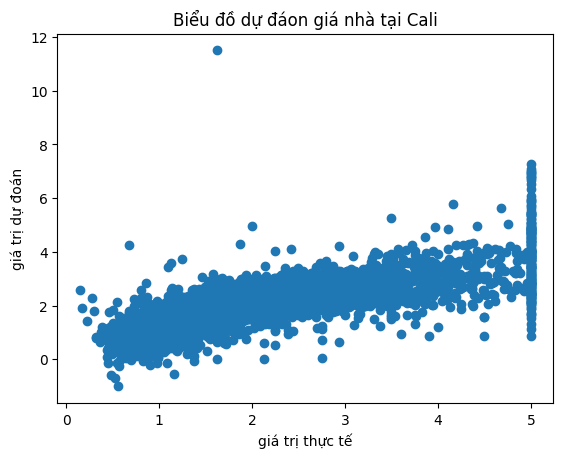

In [1]:
# sử dụng hồi quy tuyến tính để dự đoán giá nhà thông qua bộ dữ liệu fetch california
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

cali = fetch_california_housing()
x = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.Series(cali.target)


# Chia tập dữ liệu có 80% huấn luyện và 20% kiểm tra
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Xây dựng và huấn luyện mô hình
model = LinearRegression()
model.fit(x_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2) 

# vẽ biểu đồ
plt.scatter(y_test , y_pred)
plt.xlabel("giá trị thực tế")
plt.ylabel("giá trị dự đoán")
plt.title("Biểu đồ dự đáon giá nhà tại Cali")
plt.show()

In [2]:
data = np.loadtxt('/Users/macbook/Desktop/Hoc tap/Số hoá/LAB 4/lab1data1.txt', delimiter=',')
X = data[:, 0].reshape(-1, 1)  # Biên độ
y = data[:, 1]  # Điểm kiểm tra
# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Dự đoán
y_pred = model.predict(X)

# Vẽ biểu đồ
plt.scatter(X, y, color='blue')  # Điểm dữ liệu
plt.plot(X, y_pred, color='green', label='Prediction')  # Đường hồi quy
plt.xlabel('Feature')  # Nhãn trục x
plt.ylabel('exam_score')  # Nhãn trục y
plt.legend()
plt.show()

FileNotFoundError: /Users/macbook/Desktop/Hoc tap/Số hoá/LAB 4/lab1data1.txt not found.

In [ ]:
# Hồi quy Logictics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. Hồi quy Logistic để phân loại nhị phân (Breast Cancer)
data = load_breast_cancer()
X = data.data
y = data.target

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Xây dựng và huấn luyện mô hình
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 2. Phân cụm KMeans trên dữ liệu Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Áp dụng KMeans với số cụm là 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Giảm chiều bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Trực quan hóa kết quả phân cụm
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label="Cluster Centers")
plt.title("KMeans Clustering trên dữ liệu Iris")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()




Độ chính xác: 0.6848
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68      1399
           1       0.68      0.69      0.69      1399

    accuracy                           0.68      2798
   macro avg       0.68      0.68      0.68      2798
weighted avg       0.68      0.68      0.68      2798



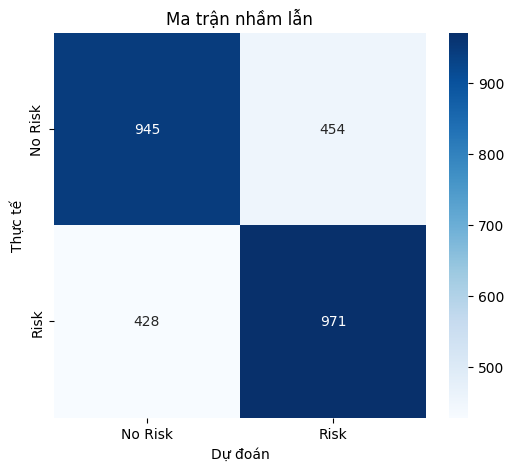

/var/folders/1m/70qfpwps5s5_mt_5gq_3fm480000gn/T/ipykernel_1215/2058726772.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, ax=axes[0], palette='coolwarm')
/var/folders/1m/70qfpwps5s5_mt_5gq_3fm480000gn/T/ipykernel_1215/2058726772.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, ax=axes[1], palette='coolwarm')


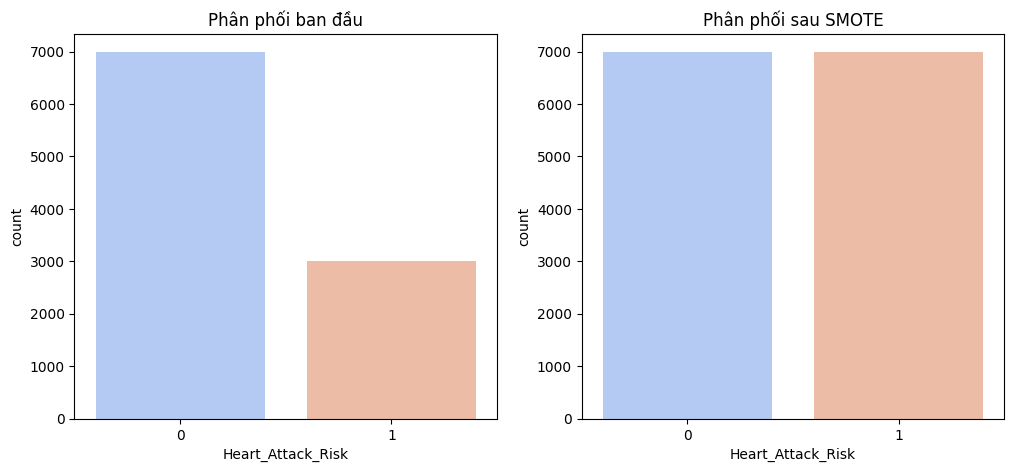

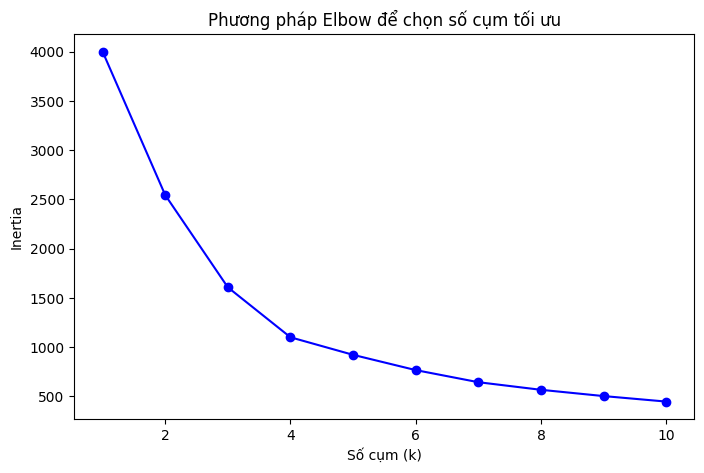

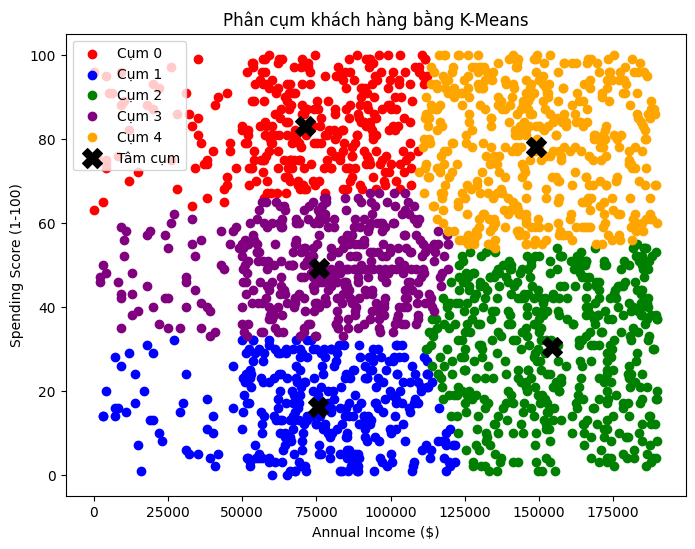

In [ ]:
#Bài tập về nhà:
# 1.CHO tập dữ liệu: Dự đoán bệnh tim bằng hồi quy logictics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Đọc dữ liệu
file_path = 'heart_attack_prediction_india.csv'
df = pd.read_csv(file_path)

# Xử lý dữ liệu
# Loại bỏ cột không cần thiết
df.drop(columns=["Patient_ID", "State_Name"], inplace=True)

# Mã hóa giới tính
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

# Tách X và y
X = df.drop(columns=["Heart_Attack_Risk"])
y = df["Heart_Attack_Risk"]

# Xử lý mất cân bằng dữ liệu bằng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Chia tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Huấn luyện mô hình
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Độ chính xác: {accuracy:.4f}")
print("Báo cáo phân loại:\n", report)

# Trực quan hóa ma trận nhầm lẫn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Ma trận nhầm lẫn')
plt.show()

# Trực quan hóa phân phối nhãn trước và sau khi dùng SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y, ax=axes[0], palette='coolwarm')
axes[0].set_title('Phân phối ban đầu')
sns.countplot(x=y_resampled, ax=axes[1], palette='coolwarm')
axes[1].set_title('Phân phối sau SMOTE')
plt.show()



# 2.Ứng dụng thuật toán Kmean cho tập dữu liệu customer data , bạn có thể lấy trên kanggle

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Đọc dữ liệu
df = pd.read_csv("Customers.csv")

# Chọn hai đặc trưng chính
X = df[['Annual Income ($)', 'Spending Score (1-100)']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tìm số cụm tối ưu bằng phương pháp Elbow
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow để chọn số cụm tối ưu')
plt.show()

# Áp dụng KMeans với số cụm tối ưu k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    plt.scatter(
        df[df['Cluster'] == i]['Annual Income ($)'],
        df[df['Cluster'] == i]['Spending Score (1-100)'],
        color=colors[i], label=f'Cụm {i}'
    )

# Vẽ tâm cụm
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Tâm cụm')

plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Phân cụm khách hàng bằng K-Means')
plt.legend()
plt.show()


# 3.TÌm hiểu về ma trận nhầm lẫn và dánh giá độ chính xác trên các bài tập lớn
'''ma trận nhầm lẫn giúp đánh giá chính xác hiệu suất của mô hình phân loại
 bằng cách phân tích các trường hợp dự đoán đúng và sai'''

'''Trong bài toán dự đoán bệnh tim bằng hồi quy logistic, ma trận nhầm lẫn sẽ giúp đánh giá mức độ 
hiệu quả của mô hình trong việc nhận diện nguy cơ bệnh tim,tránh bỏ sót bệnh nhân có nguy cơ cao và hạn chế chẩn đoán sai người khỏe mạnh.
Còn trong bài toán phân cụm khách hàng với K-Means, tuy không có ma trận nhầm lẫn do đây là bài toán không giám sát, nhưng việc đánh giá độ chính xác 
dựa trên tính hợp lý của các cụm và mức độ phân tách rõ ràng giữa các nhóm khách hàng.'''